In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("data.csv")
df=df.drop(["maxim_days_in_arrears_at", "status"], axis=1)


cat_feat=df.select_dtypes(include=[object]).columns.tolist()
df[cat_feat] = df[cat_feat].fillna('nan')

x=df.drop("target", axis=1)
y=df["target"]

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

In [3]:
model=CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)

model.fit(x_train, y_train, cat_feat)

0:	learn: 0.5360619	total: 63.1ms	remaining: 1m 3s
100:	learn: 0.0247667	total: 380ms	remaining: 3.38s
200:	learn: 0.0089486	total: 692ms	remaining: 2.75s
300:	learn: 0.0053737	total: 1s	remaining: 2.33s
400:	learn: 0.0046938	total: 1.32s	remaining: 1.98s
500:	learn: 0.0045180	total: 1.64s	remaining: 1.63s
600:	learn: 0.0042886	total: 1.95s	remaining: 1.29s
700:	learn: 0.0041603	total: 2.25s	remaining: 960ms
800:	learn: 0.0038908	total: 2.57s	remaining: 638ms
900:	learn: 0.0037480	total: 2.88s	remaining: 317ms
999:	learn: 0.0037172	total: 3.2s	remaining: 0us


In [4]:
pred=model.predict(x_test)

auc=roc_auc_score(y_test, pred)

auc

0.5

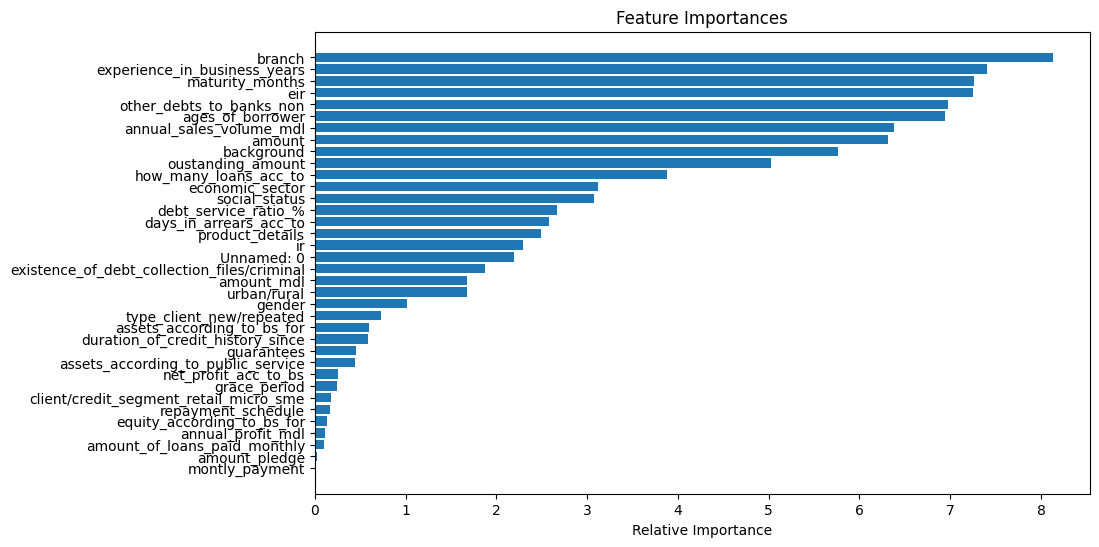

In [5]:
fi=model.feature_importances_
indices = np.argsort(fi)
features=df.columns.to_list()

# 
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), fi[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])  # 'features' is a list of feature names
plt.xlabel("Relative Importance")
plt.show()
